# **Tasks**

1. Calculate the monthly sales of the store and identify which month had the
highest sales and which month had the lowest sales.
2. Analyze sales based on product categories and determine which category has
the lowest sales and which category has the highest sales.
3. The sales analysis needs to be done based on sub-categories
4. Analyze the monthly profit from sales and determine which month had the highest profit.
5. Analyze the profit by category and sub-category.
6. Analyze the sales and profit by customer segment
7. Analyze the sales to profit ratio

In [4]:
from google.colab import drive
drive.mount('/content/Myfiles')

Mounted at /content/Myfiles


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [116]:
data= pd.read_csv('/content/Myfiles/MyDrive/Sample - Superstore.csv', encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [117]:
data.shape

(9994, 21)

In [118]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# **Converting date columns**

In [120]:
data['Order Date'] = pd.to_datetime(data['Order Date'])


In [121]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [122]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [123]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek


In [124]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1


# **Monthly sales Analysis**

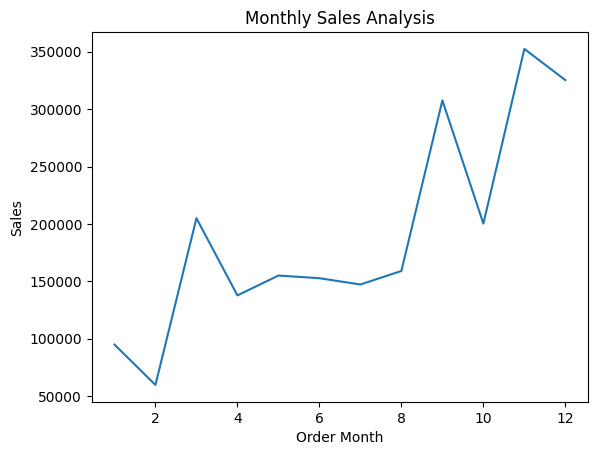

In [126]:
x = data.groupby('Order Month')['Sales'].groups.keys()
y = data.groupby('Order Month')['Sales'].sum().values

plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Analysis')
plot = plt.plot(x,y)
plt.show()



# **Sales by Category**

In [127]:

sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

In [128]:
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


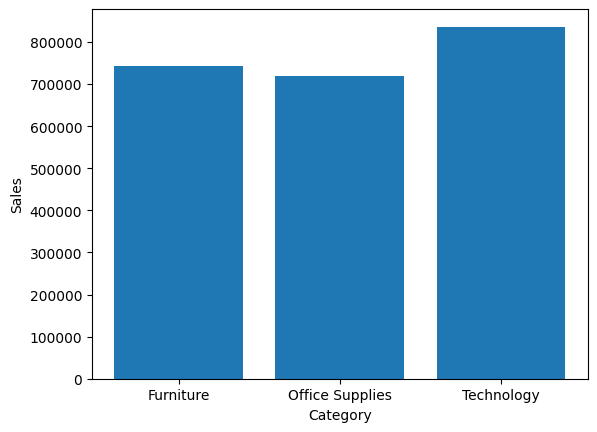

In [130]:
x = data.groupby('Category')['Sales'].sum().index
y = data.groupby('Category')['Sales'].sum().values

plt.bar(x,y)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()



# **Sales analysis by Sub Category**

In [66]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1


In [131]:
sales_by_subcategory= data.groupby('Sub-Category')['Sales'].sum()

In [132]:
sales_by_subcategory

,Sales
Sub-Category,
Accessories,167380.3180
Appliances,107532.1610
Art,27118.7920
Binders,203412.7330
Bookcases,114879.9963
Chairs,328449.1030
Copiers,149528.0300
Envelopes,16476.4020
Fasteners,3024.2800


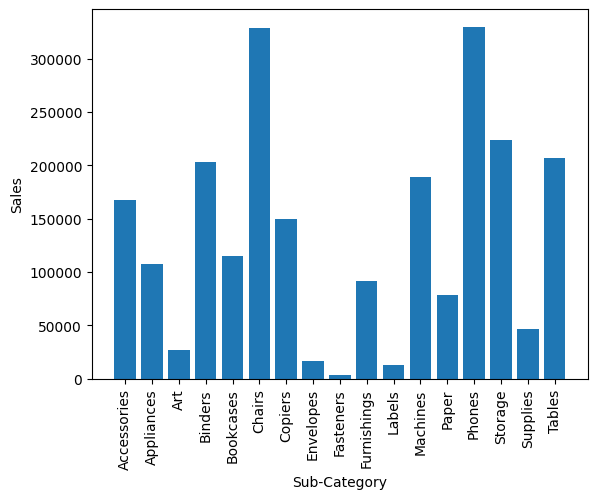

In [133]:
x = data.groupby('Sub-Category')['Sales'].sum().index
y = data.groupby('Sub-Category')['Sales'].sum().values

plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

#fig = px.bar(sales_by_subcategory,
#            y='Sales',
#             title='Sales Analysis bu Sub- Category')
#fig.show()

# **Monthly Profit Analysis**

In [134]:
profit_by_month= data.groupby('Order Month')['Profit'].sum().reset_index()

In [135]:
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


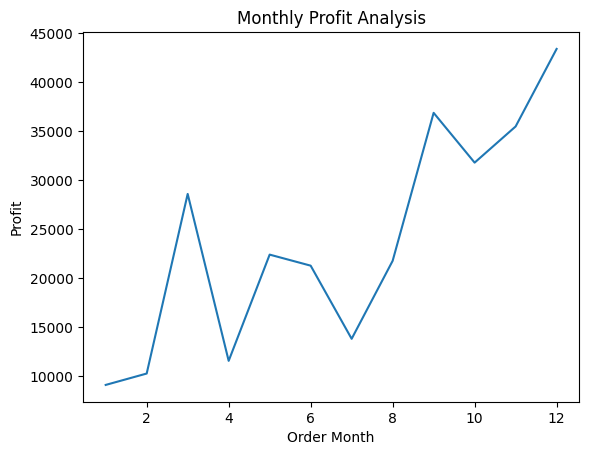

In [136]:
x = data.groupby('Order Month')['Profit'].groups.keys()
y = data.groupby('Order Month')['Profit'].sum().values

plt.xlabel('Order Month')
plt.ylabel('Profit')
plt.title('Monthly Profit Analysis')
plot = plt.plot(x,y)
plt.show()




#fig = px.line(profit_by_month,
#              x='Order Month',
#              y='Profit',
#             title='Monthly Profit Analysis')

#fig.show()

# **Profit by Category**

In [137]:
profit_by_category = data.groupby('Category')['Profit'].sum()

In [138]:
profit_by_category

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


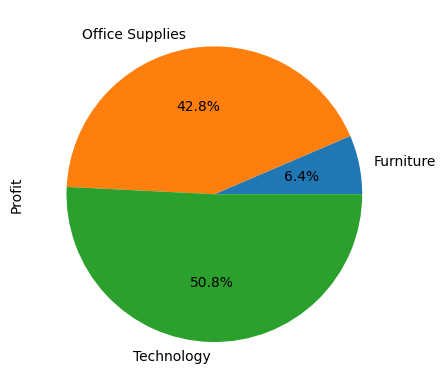

In [139]:
data.groupby('Category')['Profit'].sum().plot(kind='pie',autopct='%1.1f%%')
plt.show()


# **Profit by Subcategory**

In [140]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum()

In [141]:
profit_by_subcategory

,Profit
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


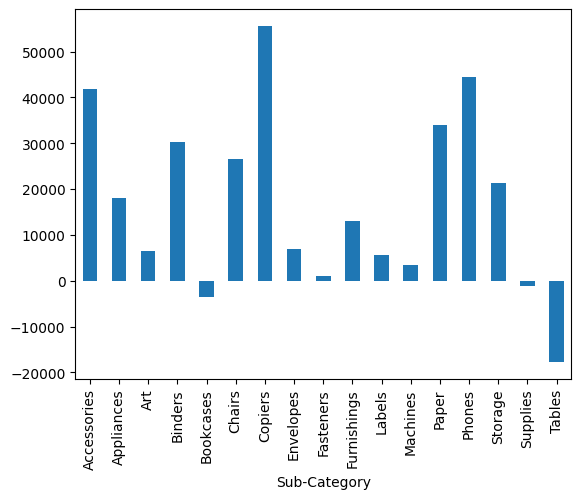

In [142]:
data.groupby('Sub-Category')['Profit'].sum().plot(kind='bar')
plt.show()

# **Sals and Profit - Customer Segment**

In [79]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day of Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


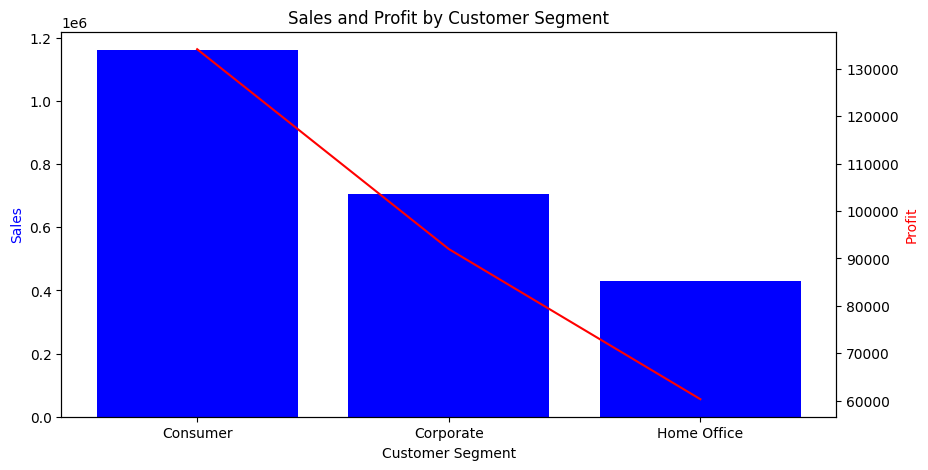

In [143]:
segment_analysis = data.groupby('Segment')[['Profit','Sales']].sum()
fig,ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()

ax1.bar(segment_analysis.index,segment_analysis['Sales'],color='b',label='Sales')
ax2.plot(segment_analysis.index,segment_analysis['Profit'],color='r',label='Profit')


ax1.set_xlabel('Customer Segment')
ax1.set_ylabel('Sales',color='b')
ax2.set_ylabel('Profit',color='r')
plt.title('Sales and Profit by Customer Segment')
plt.show()

# **Sales to Profit Ratio**

In [144]:
sales_profit_by_segment = data.groupby('Segment')[['Profit','Sales']].sum()
sales_profit_by_segment['Sales to Profit Ratio'] = sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
print(sales_profit_by_segment)

                  Profit         Sales  Sales to Profit Ratio
Segment                                                      
Consumer     134119.2092  1.161401e+06               8.659471
Corporate     91979.1340  7.061464e+05               7.677245
Home Office   60298.6785  4.296531e+05               7.125416


**Conclusion**

1.Lowest sale is in November month AND Highest sale is in Janeuary month.

2.Highest Sale Category:

1.   Technology
2.   Furniture
3.   Office Supplies

3.Phone is Highest sale in sub-category.

4.Highest profit is in Dec AND Lowest profit is in Janeuary.

5.Technology is the highest sale in Category AND Coppiers is the highest sale in sub-categories.

6.Consumer is the highest sale, Second was corporate customer segment and third was home office.

7.Sales to Profit Ratio is 8.65